In [1]:
import pandas as pd
import numpy as np
import sys
import os

# Thêm đường dẫn thư mục gốc của dự án vào PYTHONPATH
project_path = '/Users/nhinguyen/Documents/KLTN/STOCK-MOVEMENT-PREDICTION-USING-MACHINE-LEARNING-BASED-ON-TECHNICAL-INDICATORS'
if project_path not in sys.path:
    sys.path.append(project_path)

from indicators.ta_indicators import calculate_indicators_for_group

stocks = pd.read_csv(os.path.join(project_path, 'data/bid_ohlc.csv'))
stocks['trading_date'] = pd.to_datetime(stocks['trading_date'], errors='coerce')
stocks = stocks[stocks['trading_date'] >= '2014-01-01']
stocks = stocks.sort_values(['trading_date'])
stock_data_with_indicators = stocks.groupby('ticker').apply(calculate_indicators_for_group).reset_index(drop=True)
stock_data_with_indicators['key'] = stock_data_with_indicators["ticker"] + stock_data_with_indicators["trading_date"].dt.strftime("%Y-%m-%d")


fundamental_metrics = pd.read_csv(os.path.join(project_path, 'data/bid_fa.csv'))
fundamental_metrics = fundamental_metrics[['ticker', 'trading_date', 'pb', 'pe', 'roe', 'roa']]
fundamental_metrics['trading_date'] = pd.to_datetime(fundamental_metrics['trading_date'], errors='coerce')
fundamental_metrics['key'] = fundamental_metrics["ticker"] + fundamental_metrics["trading_date"].dt.strftime("%Y-%m-%d")
ticker = ['BID']
fundamental_metrics = fundamental_metrics[fundamental_metrics['ticker'].isin(ticker)]
fundamental_metrics


data = pd.merge(stock_data_with_indicators, fundamental_metrics, how="left", on="key").sort_values(by='trading_date_x')
data.dropna(inplace=True)
data

,ticker_x,trading_date_x,open,high,low,close,volume,MACD,RSI,Compare Close MA(20),...,Max_t0_t25,Pct_Diff,Y,key,ticker_y,trading_date_y,pb,pe,roe,roa
0,BID,2014-03-03,8711.90,8763.45,8608.80,8608.80,954830.0,31.379789,44.444444,0.983220,...,9691.35,-11.170270,-1,BID2014-03-03,BID,2014-03-03,1.444305,0.000000,0.142028,0.008160
1,BID,2014-03-04,8557.25,8608.80,8505.70,8557.25,1551740.0,28.218397,44.444444,0.983704,...,9691.35,-11.702188,-1,BID2014-03-04,BID,2014-03-04,1.435657,0.000000,0.142028,0.008160
2,BID,2014-03-05,8608.80,8660.35,8557.25,8557.25,737090.0,26.874969,50.000000,0.988978,...,9691.35,-11.702188,-1,BID2014-03-05,BID,2014-03-05,1.435657,0.000000,0.142028,0.008160
3,BID,2014-03-06,8557.25,8608.80,8505.70,8557.25,768340.0,26.680177,42.857143,0.991933,...,9691.35,-11.702188,-1,BID2014-03-06,BID,2014-03-06,1.435657,0.000000,0.142028,0.008160
4,BID,2014-03-07,8557.25,8608.80,8557.25,8557.25,773450.0,27.154730,46.153846,0.991933,...,9691.35,-11.702188,-1,BID2014-03-07,BID,2014-03-07,1.435657,0.000000,0.142028,0.008160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,BID,2024-03-25,54200.00,55500.00,52700.00,53000.00,1264961.0,-96.935681,44.067797,1.003883,...,54400.00,-2.573529,0,BID2024-03-25,BID,2024-03-25,2.561438,14.018476,0.180520,0.009855
2517,BID,2024-03-26,53000.00,53900.00,53000.00,53000.00,1411023.0,-105.292692,44.067797,1.003883,...,54400.00,-2.573529,0,BID2024-03-26,BID,2024-03-26,2.561438,14.018476,0.180520,0.009855
2518,BID,2024-03-27,53300.00,53300.00,52500.00,52500.00,1609580.0,-145.087421,46.428571,0.995733,...,54400.00,-3.492647,0,BID2024-03-27,BID,2024-03-27,2.537273,13.886227,0.180520,0.009855
2519,BID,2024-03-28,53200.00,53900.00,52500.00,52600.00,1360986.0,-163.879316,58.241758,0.998008,...,54400.00,-3.308824,0,BID2024-03-28,BID,2024-03-28,2.542106,13.912676,0.180520,0.009855


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=40, max_features=None, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=50, max_features=None, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=None, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=None, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END max_depth=50, max_features=None, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_de

/Users/nhinguyen/Library/Python/3.11/lib/python/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
69 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nhinguyen/Library/Python/3.11/lib/python/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nhinguyen/Library/Python/3.11/lib/python/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/nhinguyen/Library/Python/3.11/lib/python/site-packages/sklearn/base.py", line 638, in _validate_params
    valida

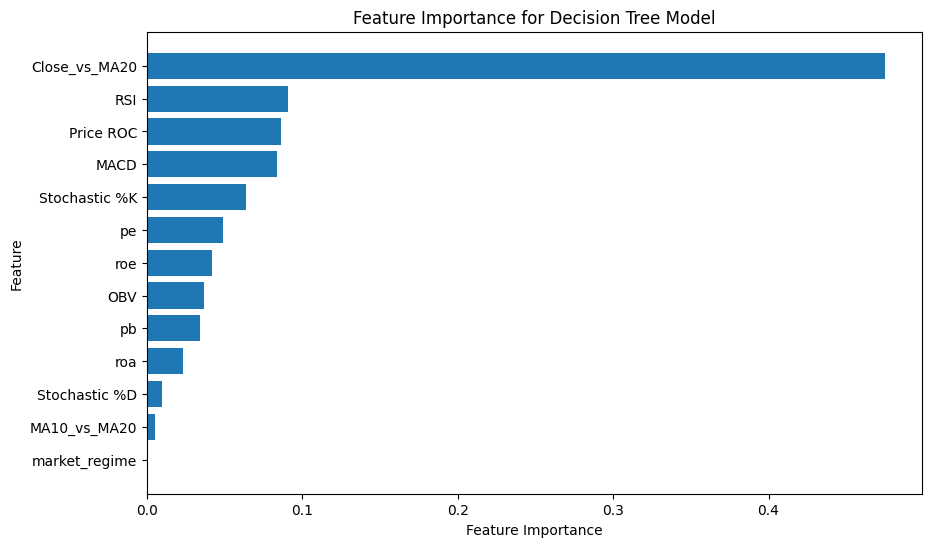

(DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=5, random_state=42),
      ticker_x trading_date_x      open      high       low     close  \
 0         BID     2014-03-03   8711.90   8763.45   8608.80   8608.80   
 1         BID     2014-03-04   8557.25   8608.80   8505.70   8557.25   
 2         BID     2014-03-05   8608.80   8660.35   8557.25   8557.25   
 3         BID     2014-03-06   8557.25   8608.80   8505.70   8557.25   
 4         BID     2014-03-07   8557.25   8608.80   8557.25   8557.25   
 ...       ...            ...       ...       ...       ...       ...   
 2516      BID     2024-03-25  54200.00  55500.00  52700.00  53000.00   
 2517      BID     2024-03-26  53000.00  53900.00  53000.00  53000.00   
 2518      BID     2024-03-27  53300.00  53300.00  52500.00  52500.00   
 2519      BID     2024-03-28  53200.00  53900.00  52500.00  52600.00   
 2520      BID     2024-03-29  53200.00  53200.00  52000.00  52100.00   
 
          volume        MACD        RSI

In [5]:
import pandas as pd
import numpy as np
import sys
import os
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt

def decision_tree(data: pd.DataFrame):
    X = data[['Stochastic %D', 'Stochastic %K', 'MACD', 'RSI', 'OBV', 'MA10_vs_MA20', 'Close_vs_MA20', 'Price ROC', 'market_regime', 'pb', 'pe', 'roe', 'roa']]
    y = data['Y']

    # Map the target variable to the expected range if necessary
    y = y.map({-1: 2, 0: 0, 1: 1})

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    param_distributions = {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4, 8],
        'max_features': [None, 'auto', 'sqrt', 'log2']
    }

    dt_model = DecisionTreeClassifier(random_state=42)

    dt_random = RandomizedSearchCV(estimator=dt_model, param_distributions=param_distributions,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

    dt_random.fit(X_train, y_train)

    print("Best Hyperparameters:", dt_random.best_params_)

    best_dt_model = dt_random.best_estimator_
    y_train_pred = best_dt_model.predict(X_train)
    y_test_pred = best_dt_model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    train_class_report = classification_report(y_train, y_train_pred)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_class_report = classification_report(y_test, y_test_pred)

    print("Training Set Evaluation")
    print("Accuracy:", train_accuracy)
    print("Confusion Matrix:\n", train_conf_matrix)
    print("Classification Report:\n", train_class_report)

    print("Test Set Evaluation")
    print("Accuracy:", test_accuracy)
    print("Confusion Matrix:\n", test_conf_matrix)
    print("Classification Report:\n", test_class_report)

    feature_importances = best_dt_model.feature_importances_
    features = X.columns
    feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Decision Tree Model')
    plt.gca().invert_yaxis()
    plt.show()

    # Save the model
    joblib.dump(best_dt_model, os.path.join(project_path, 'models/best_decision_tree_model.pkl'))

    data['Y_predict'] = best_dt_model.predict(X)

    return best_dt_model, data
# Example usage:
dt_result = decision_tree(data)
dt_result


In [6]:
def calculate_performance(data: pd.DataFrame):
    returns = data['close'].pct_change()
    signals = data['Y_predict'].shift(1)
    strategy_returns = signals * returns

    mean_return = strategy_returns.mean() * 252  # Annualized return
    volatility = strategy_returns.std() * np.sqrt(252)  # Annualized volatility
    sharpe_ratio = mean_return / volatility
    max_drawdown = (strategy_returns.cumsum() - strategy_returns.cumsum().cummax()).min()


    return {
        'Return p.a.': mean_return,
        'Volatility p.a.': volatility,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown,
    }

performance_metrics = calculate_performance(data)
performance_metrics

{'Return p.a.': 0.16931650004071577,
 'Volatility p.a.': 0.5211115504984652,
 'Sharpe Ratio': 0.3249141184430807,
 'Max Drawdown': -1.3682285136585883}